In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
#warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df_kidneyst = pd.read_csv('/content/drive/MyDrive/kidney-stone-dataset - Copy.csv')

# df_kidneyst = pd.read_csv("kidney-stone-dataset - Copy.csv")    #C:\Users\user\Desktop
df_kidneyst

,age,sex,Unnamed: 2,gravity,ph,osmo,cond,urea,calc,target
0,6,1,0,1.021000,4.910000,725,14.000000,443,2.450000,0
1,36,0,1,1.017000,5.740000,577,20.000000,296,4.490000,0
2,76,0,2,1.008000,7.200000,321,14.900000,101,2.360000,0
3,34,1,3,1.011000,5.510000,408,12.600000,224,2.150000,0
4,28,1,4,1.005000,6.520000,187,7.500000,91,1.160000,0
...,...,...,...,...,...,...,...,...,...,...
85,20,0,85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,76,0,86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,76,1,87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,51,1,88,1.023870,5.106433,325,12.124689,50,0.781620,1


In [14]:
type(df_kidneyst)

pandas.core.frame.DataFrame

In [15]:
df_kidneyst.shape

(90, 10)

In [16]:
df_kidneyst.columns

Index(['age', 'sex', 'Unnamed: 2', 'gravity', 'ph', 'osmo', 'cond', 'urea',
       'calc', 'target'],
      dtype='object')

In [17]:
df_kidneyst.head(5)

,age,sex,Unnamed: 2,gravity,ph,osmo,cond,urea,calc,target
0,6,1,0,1.021,4.91,725,14.0,443,2.45,0
1,36,0,1,1.017,5.74,577,20.0,296,4.49,0
2,76,0,2,1.008,7.20,321,14.9,101,2.36,0
3,34,1,3,1.011,5.51,408,12.6,224,2.15,0
4,28,1,4,1.005,6.52,187,7.5,91,1.16,0


In [18]:
df_kidneyst.sample(5)

,age,sex,Unnamed: 2,gravity,ph,osmo,cond,urea,calc,target
80,54,1,80,1.019771,5.56394,377,12.653209,116,6.043176,1
68,54,1,68,1.028000,4.76000,312,12.400000,10,0.270000,1
23,21,0,23,1.020000,5.96000,631,11.200000,422,1.550000,0
44,97,0,44,1.020000,5.68000,876,35.800000,308,4.490000,0
9,76,1,9,1.021000,6.13000,779,25.700000,382,2.210000,1


In [19]:
print('total categories of diseases')

print(len(df_kidneyst.target.unique()))

total categories of diseases
2


In [20]:
df_kidneyst["target"].unique()


array([0, 1])

In [21]:
df_kidneyst["target"].nunique()

2

In [22]:
df_kidneyst.groupby('target').size()

,0
target,
0,35
1,55


In [23]:
df_kidneyst["target"].value_counts()

,count
target,
1,55
0,35


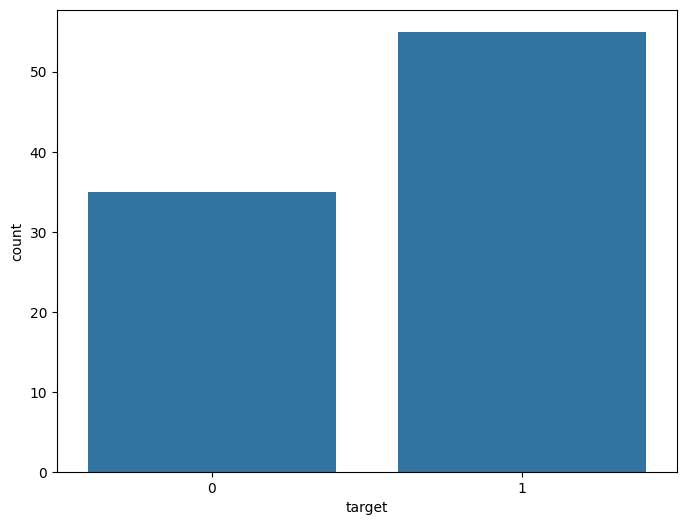

In [24]:
f , ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = "target" ,data=df_kidneyst)
plt.show()

In [25]:
df_kidneyst.groupby('sex')['target'].value_counts()

sex  target
0    1         24
     0         19
1    1         31
     0         16
Name: count, dtype: int64

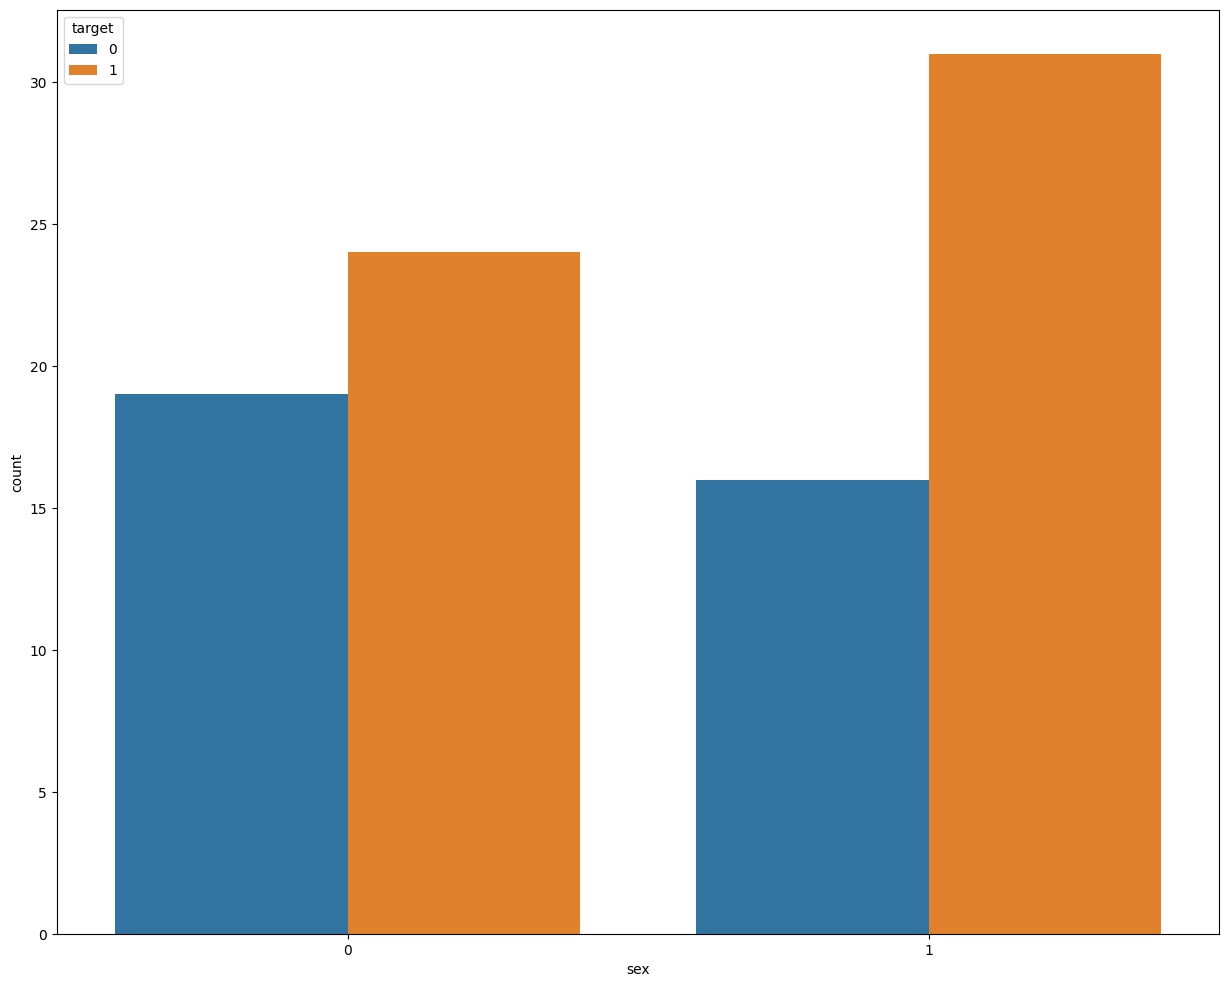

In [26]:
f , ax = plt.subplots(figsize=(15,12))
ax = sns.countplot(x = "sex", hue="target" ,data=df_kidneyst)
plt.show()

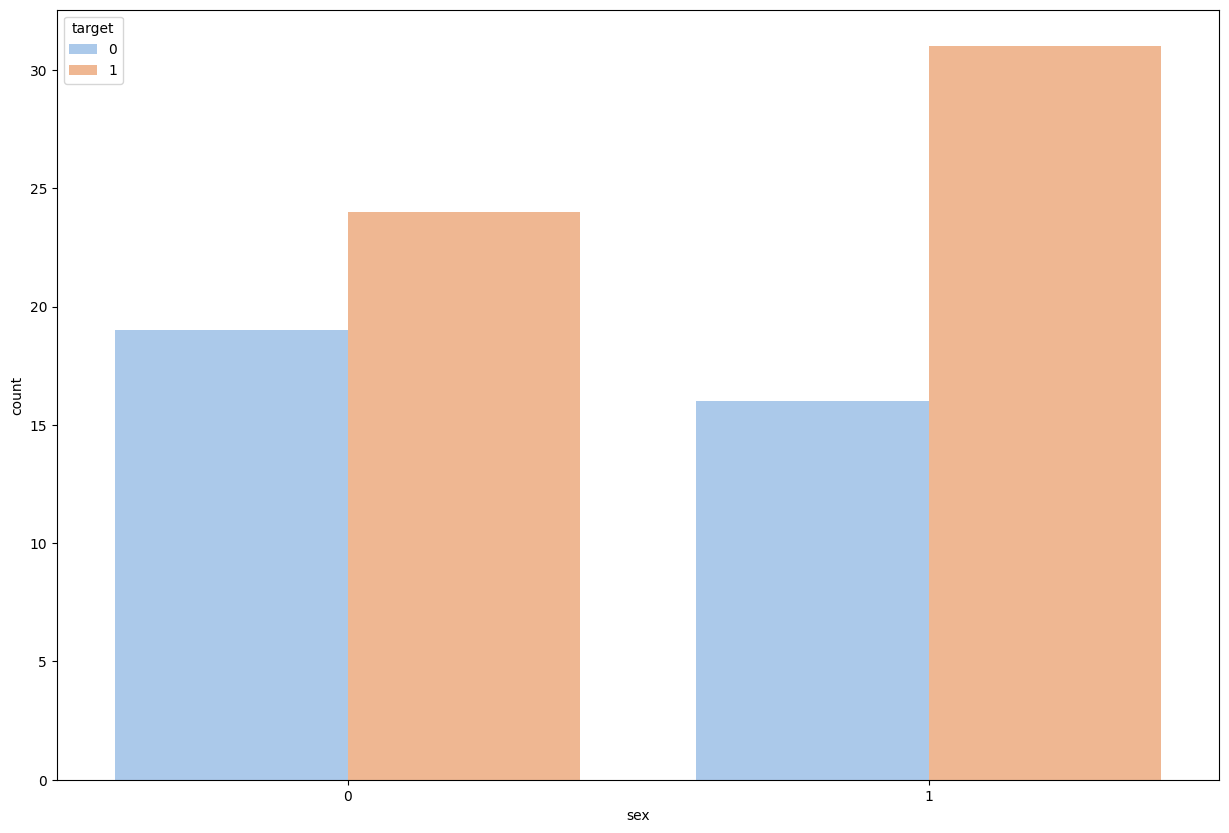

In [27]:
f , ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x="sex", hue="target", data=df_kidneyst, palette="pastel")
plt.show()

In [28]:
df_kidneyst.describe()

,age,sex,Unnamed: 2,gravity,ph,osmo,cond,urea,calc,target
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,49.755556,0.522222,44.500000,1.017952,6.036651,602.333333,20.621687,258.200000,4.017788,0.611111
std,24.206189,0.502304,26.124701,0.006780,0.711801,238.459805,7.654448,135.381127,3.016273,0.490229
min,6.000000,0.000000,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,32.000000,0.000000,22.250000,1.012258,5.536520,411.500000,14.150000,148.250000,1.412500,0.000000
50%,50.000000,1.000000,44.500000,1.018000,5.936247,572.000000,21.177172,231.500000,3.230000,1.000000
75%,69.250000,1.000000,66.750000,1.023000,6.490000,778.000000,26.075000,366.250000,5.965127,1.000000
max,98.000000,1.000000,89.000000,1.034000,7.940000,1236.000000,38.000000,620.000000,13.000000,1.000000


In [29]:
df_kidneyst["target"].describe()

,target
count,90.000000
mean,0.611111
std,0.490229
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [30]:
df_kidneyst["sex"].describe()

,sex
count,90.000000
mean,0.522222
std,0.502304
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [31]:
print(df_kidneyst.corr()["target"].sort_values(ascending=True))

ph           -0.167671
cond         -0.043540
age           0.012730
osmo          0.068787
urea          0.099040
sex           0.103933
gravity       0.234303
calc          0.325397
Unnamed: 2    0.595264
target        1.000000
Name: target, dtype: float64


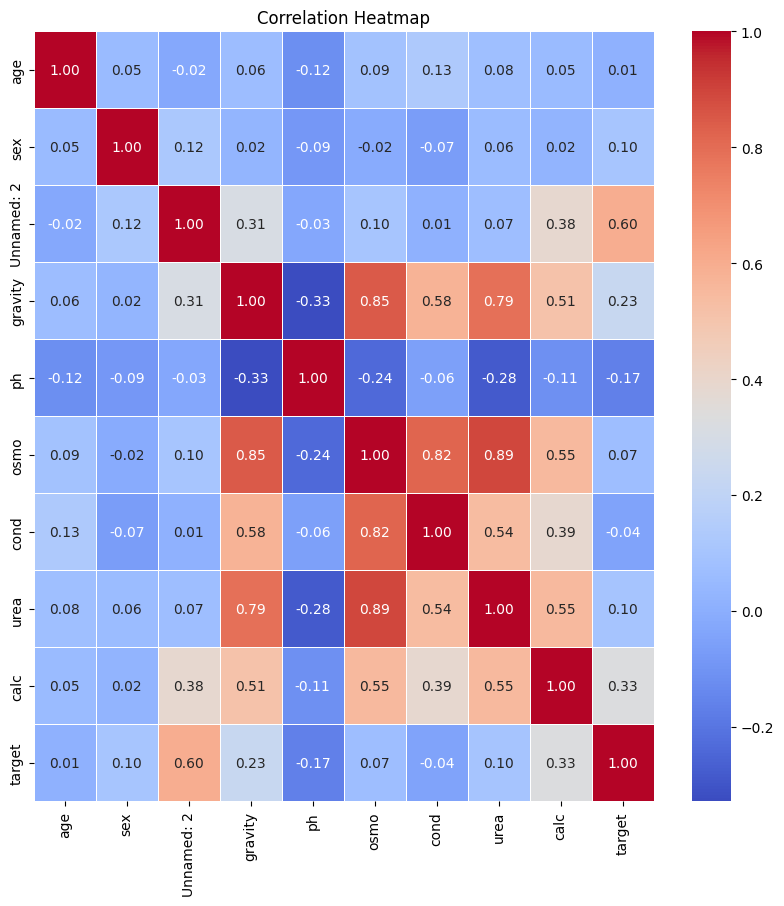

In [32]:
# heatmap
numeric_columns = df_kidneyst.select_dtypes(include='number')

# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()
#fig, ax = plt.subplots(figsize=(10,10))
#sns.heatmap(df_kidneyst[("age","sex","Unnamed","gravity","ph","osmo","cond","urea","calc","target")])
#plt.show()

In [33]:
numeric_columns.sample()

,age,sex,Unnamed: 2,gravity,ph,osmo,cond,urea,calc,target
16,34,1,16,1.007,6.63,253,8.4,133,1.05,1


# analysis of feature correlated with income

# analyzing both age and target

In [34]:
df_kidneyst['age'].nunique()

43

In [35]:
df_kidneyst['age'].value_counts()

,count
age,
76,6
34,6
32,6
65,5
87,4
43,4
56,4
67,4
78,4


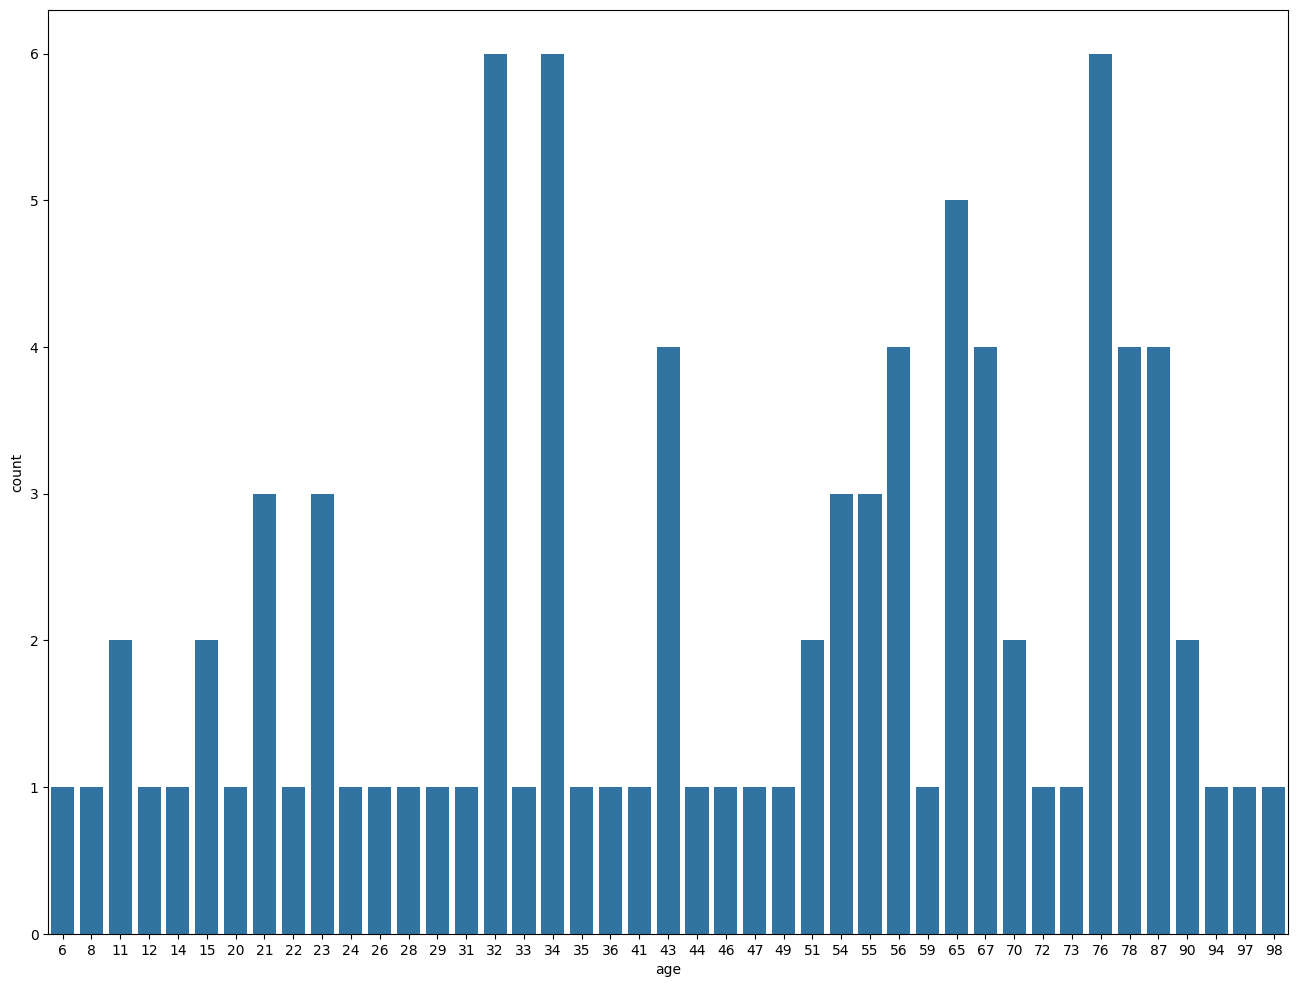

In [36]:
f , ax = plt.subplots(figsize=(16,12))
ax = sns.countplot(x = "age" ,data=df_kidneyst)
plt.show()

In [37]:
df_kidneyst.groupby('age')['target'].value_counts()

age  target
6    0         1
8    1         1
11   0         1
     1         1
12   1         1
14   1         1
15   0         1
     1         1
20   1         1
21   0         3
22   0         1
23   1         2
     0         1
24   1         1
26   1         1
28   0         1
29   1         1
31   0         1
32   1         5
     0         1
33   0         1
34   1         4
     0         2
35   1         1
36   0         1
41   0         1
43   1         3
     0         1
44   1         1
46   0         1
47   0         1
49   0         1
51   1         2
54   1         3
55   1         3
56   0         2
     1         2
59   1         1
65   0         3
     1         2
67   1         4
70   0         1
     1         1
72   0         1
73   1         1
76   1         4
     0         2
78   1         3
     0         1
87   0         2
     1         2
90   0         1
     1         1
94   0         1
97   0         1
98   1         1
Name: count, dtype: int64

# Multivariate analysis
perform to discover pattern and relationships in dataset

# analyzing the target

target
1    55
0    35
Name: count, dtype: int64


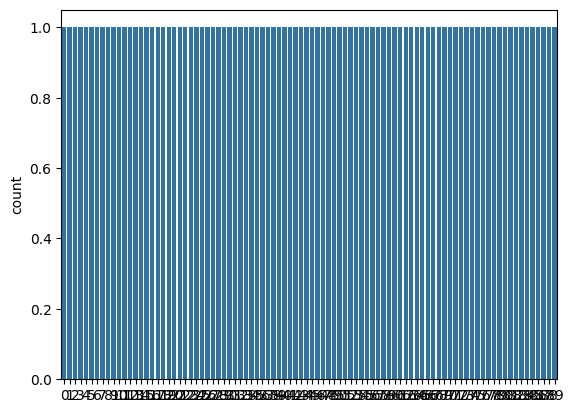

In [38]:
y = df_kidneyst["target"]

sns.countplot(y)
target_temp = df_kidneyst.target.value_counts()
print(target_temp)

In [39]:
print("Percentage of patients with kidney stone: " + str(round(target_temp[1] * 100 / 91, 2)) + "%")
print("Percentage of patients with kidney stone: " + str(round(target_temp[0] * 100 / 91, 2)) + "%")

Percentage of patients with kidney stone: 60.44%
Percentage of patients with kidney stone: 38.46%


In [40]:
df_kidneyst["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

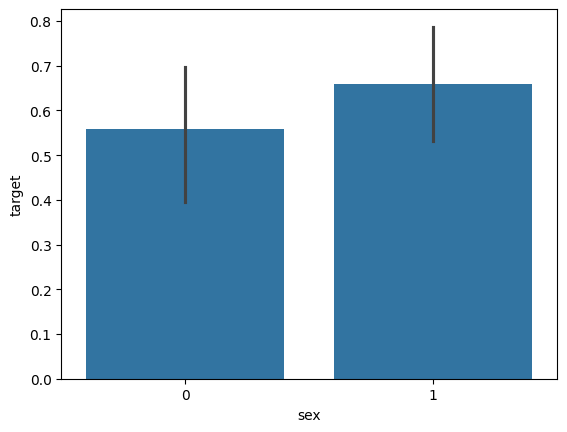

In [41]:
#sns.barplot(df_incomeprid["sex"],["target"])   df_incomeprid["target"]
sns.barplot(x=df_kidneyst["sex"], y=df_kidneyst["target"])


<ipython-input-42-2505324403>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_kidneyst['sex'])


<Axes: xlabel='sex', ylabel='Density'>

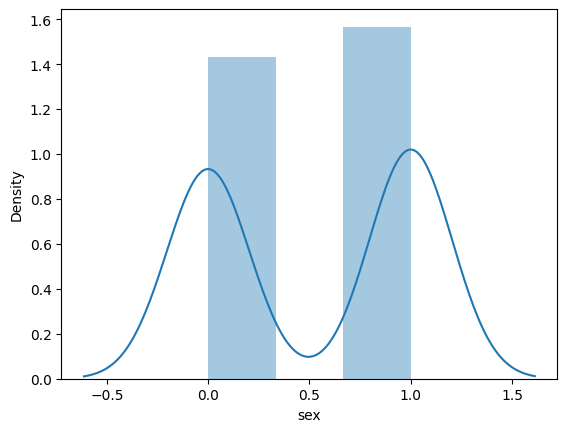

In [42]:
sns.distplot(df_kidneyst['sex'])

# analyzing the "ph" feature

In [43]:
df_kidneyst["ph"].nunique()

80

# analysing other features

In [44]:
df_kidneyst["age"].describe()

,age
count,90.000000
mean,49.755556
std,24.206189
min,6.000000
25%,32.000000
50%,50.000000
75%,69.250000
max,98.000000


In [45]:
df_kidneyst["age"].nunique()

43

<ipython-input-46-275732707>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_kidneyst['age'])


<Axes: xlabel='age', ylabel='Density'>

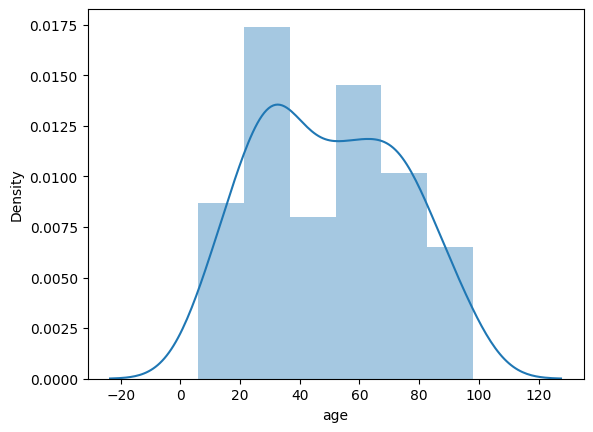

In [46]:
sns.distplot(df_kidneyst['age'])

In [47]:
df_kidneyst["gravity"].describe()

,gravity
count,90.000000
mean,1.017952
std,0.006780
min,1.005000
25%,1.012258
50%,1.018000
75%,1.023000
max,1.034000


In [48]:
df_kidneyst["gravity"].nunique()

41

In [49]:
df_kidneyst["osmo"].describe()

,osmo
count,90.000000
mean,602.333333
std,238.459805
min,187.000000
25%,411.500000
50%,572.000000
75%,778.000000
max,1236.000000


In [50]:
df_kidneyst["osmo"].nunique()

85

<ipython-input-51-123324407>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_kidneyst['osmo'])


<Axes: xlabel='osmo', ylabel='Density'>

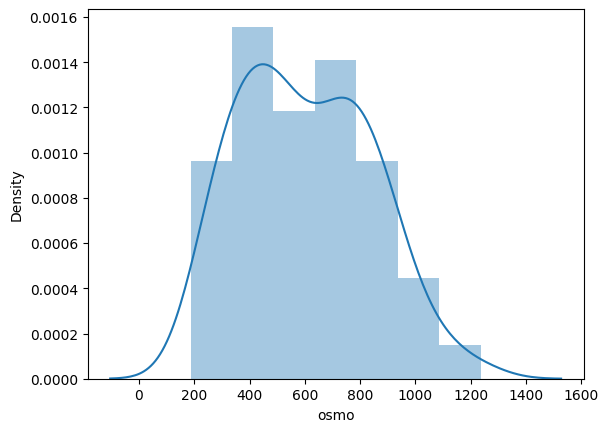

In [51]:
sns.distplot(df_kidneyst['osmo'])

In [52]:
df_kidneyst["cond"].describe()

,cond
count,90.000000
mean,20.621687
std,7.654448
min,5.100000
25%,14.150000
50%,21.177172
75%,26.075000
max,38.000000


In [53]:
df_kidneyst["cond"].nunique()

76

<ipython-input-54-2602355413>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_kidneyst['cond'])


<Axes: xlabel='cond', ylabel='Density'>

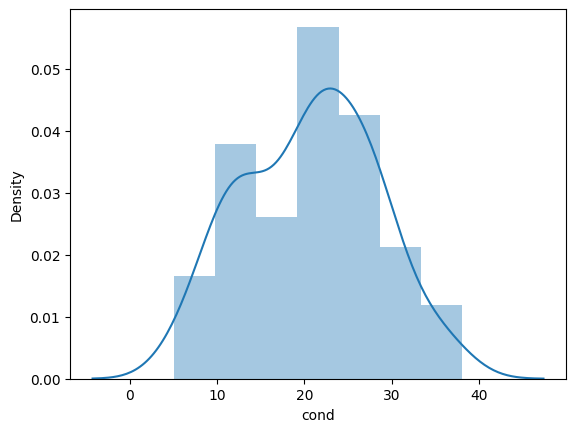

In [54]:
sns.distplot(df_kidneyst['cond'])

In [55]:
df_kidneyst["urea"].describe()

,urea
count,90.000000
mean,258.200000
std,135.381127
min,10.000000
25%,148.250000
50%,231.500000
75%,366.250000
max,620.000000


In [56]:
df_kidneyst["urea"].unique()

array([443, 296, 101, 224,  91, 252, 195, 550, 170, 382, 152, 448,  64,
       147, 161, 284, 133, 395,  95, 214, 380, 199,  87, 422, 239, 270,
        75,  72, 159, 349, 282, 297, 317, 130, 362, 330, 125, 260,  97,
       311, 385, 104, 187, 126, 308, 325, 354, 360, 302, 364, 197, 188,
       124, 398, 516, 212, 473, 620, 430, 198, 184, 164, 141, 396, 457,
        10, 272, 418, 301, 394, 255, 178,  70, 204, 116, 110, 453, 137,
       367, 576,  50, 174])

In [57]:
df_kidneyst["urea"].nunique()

82

<ipython-input-58-640787583>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_kidneyst['urea'])


<Axes: xlabel='urea', ylabel='Density'>

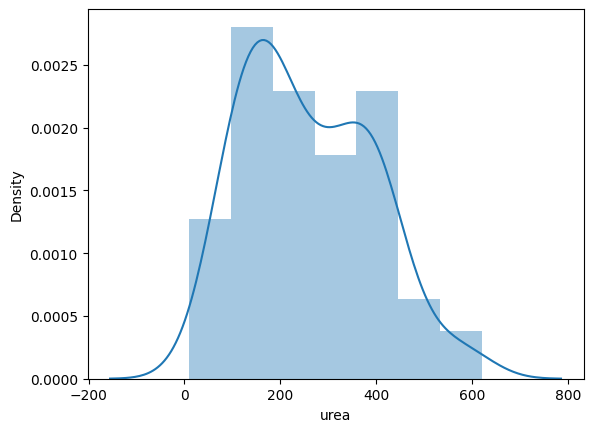

In [58]:
sns.distplot(df_kidneyst['urea'])

# train test split

In [59]:
#from sklearn.modle_selection import train_test_split

#features = df_incomeprid.drop("target", axis=1)
#target = df_incomeprid["target"]

#X_tarin,X_test,Y_train,Y_test= train_test_split(features,target,test_size=0.20, random_state=0)

from sklearn.model_selection import train_test_split

features = df_kidneyst.drop("target", axis=1)
target = df_kidneyst["target"]

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.20, random_state=0)


In [60]:
X_train.shape

(72, 9)

In [61]:
X_test.shape

(18, 9)

In [62]:
Y_train.shape

(72,)

In [63]:
Y_test.shape

(18,)

In [64]:
y = df_kidneyst.target
X = df_kidneyst.drop( 'target', axis=1)
print(y.shape)
print(X.shape)

(90,)
(90, 9)


In [65]:
print("shape of X_train:"+str(X_train.shape))
print("shape of Y_train:"+str(Y_train.shape))
print("shape of X_test:"+str(X_test.shape))
print("shape of Y_test:"+str(Y_test.shape))

shape of X_train:(72, 9)
shape of Y_train:(72,)
shape of X_test:(18, 9)
shape of Y_test:(18,)


# V MODLE FITTING
LOGISTIC REGRESSION

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split


In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
Y_pred_lr.shape

(18,)

# To Check the accuracy

In [69]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [70]:
score_lr=round(accuracy_score (Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved during logistic regression:"+str(score_lr) + "%")

The accuracy score achieved during logistic regression:66.67%


# confusion matrics and classification report


In [71]:
print(metrics.confusion_matrix(Y_pred_lr,Y_test))
print(classification_report(Y_test,Y_pred_lr))

[[6 3]
 [3 6]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.67      0.67      0.67         9

    accuracy                           0.67        18
   macro avg       0.67      0.67      0.67        18
weighted avg       0.67      0.67      0.67        18



# Navie byes

In [72]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit (X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [73]:
Y_pred_nb.shape

(18,)

In [74]:
score_nb=round(accuracy_score (Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved during naive bayes:"+str(score_nb) + "%")

The accuracy score achieved during naive bayes:83.33%


In [75]:
print(metrics.confusion_matrix(Y_pred_nb,Y_test))
print(classification_report(Y_test,Y_pred_nb))

[[8 2]
 [1 7]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.88      0.78      0.82         9

    accuracy                           0.83        18
   macro avg       0.84      0.83      0.83        18
weighted avg       0.84      0.83      0.83        18



# SVM

In [76]:
from sklearn import svm
sv = svm.SVC(kernel = "linear")
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)

In [77]:
Y_pred_svm.shape

(18,)

In [78]:
score_svm=round(accuracy_score (Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved during naive bayes:"+str(score_svm) + "%")

The accuracy score achieved during naive bayes:61.11%


In [79]:
print(metrics.confusion_matrix(Y_pred_svm,Y_test))
print(classification_report(Y_test,Y_pred_svm))

[[6 4]
 [3 5]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.62      0.56      0.59         9

    accuracy                           0.61        18
   macro avg       0.61      0.61      0.61        18
weighted avg       0.61      0.61      0.61        18



# k nearest neighbour

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit (X_train, Y_train)

Y_pred_knn = knn.predict(X_test)

In [81]:
Y_pred_knn.shape

(18,)

In [82]:
score_knn=round(accuracy_score (Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved during naive bayes:"+str(score_knn) + "%")

The accuracy score achieved during naive bayes:44.44%


# Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range (200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit (X_train, Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy= round(accuracy_score(Y_pred_dt, Y_test)*100,2)
    if (current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        #score_lr=round(accuracy_score (Y_pred_lr,Y_test)*100,2)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit (X_train, Y_train)
Y_pred_dt = dt.predict(X_test)


In [84]:
print(Y_pred_dt.shape)

(18,)


In [85]:
score_dt=round(accuracy_score (Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved during decion tree:"+str(score_dt) + "%")

The accuracy score achieved during decion tree:83.33%


# Forest Tree

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)


In [87]:
print(Y_pred_rf.shape)

(18,)


In [88]:
score_rf=round(accuracy_score (Y_pred_rf,Y_test)*100,2)
print("The accuracy score achieved during forest:"+str(score_rf) + "%")

The accuracy score achieved during forest:88.89%


In [89]:
print(metrics.confusion_matrix(Y_pred_rf,Y_test))
print(classification_report(Y_test,Y_pred_rf))

[[8 1]
 [1 8]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.89      0.89      0.89         9

    accuracy                           0.89        18
   macro avg       0.89      0.89      0.89        18
weighted avg       0.89      0.89      0.89        18



# Output final score

In [90]:
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf]#, "Source Vector Machine"

algorithms = ["Logistic Regression", "Naive Bayes","Source Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest"]
for i in range(len(algorithms)):
    print("The accuracy score achieved using " + algorithms[i] + " is: " + str(scores[i]) + "%")


The accuracy score achieved using Logistic Regression is: 66.67%
The accuracy score achieved using Naive Bayes is: 83.33%
The accuracy score achieved using Source Vector Machine is: 61.11%
The accuracy score achieved using K-Nearest Neighbors is: 44.44%
The accuracy score achieved using Decision Tree is: 83.33%
The accuracy score achieved using Random Forest is: 88.89%


<ipython-input-91-1006609059>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=scores, palette="viridis")


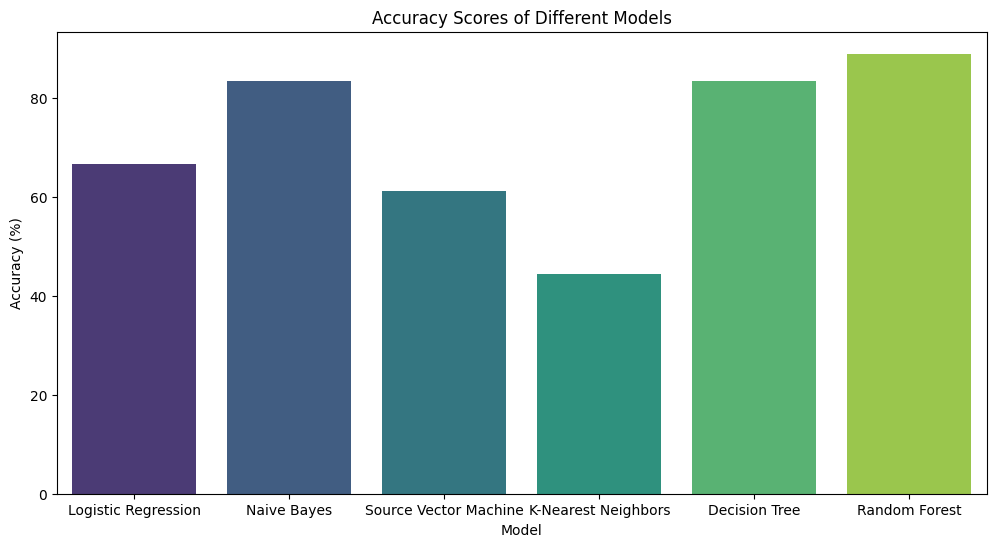

In [91]:
plt.figure(figsize=(12, 6))
model_names = ["Logistic Regression", "Naive Bayes","Source Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest"]
sns.barplot(x=model_names, y=scores, palette="viridis")
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.show()

# Building a pridictive System

In [92]:
df_kidneyst.head(2)

,age,sex,Unnamed: 2,gravity,ph,osmo,cond,urea,calc,target
0,6,1,0,1.021,4.91,725,14.0,443,2.45,0
1,36,0,1,1.017,5.74,577,20.0,296,4.49,0


In [93]:
input_data = (28, 1, 4, 1.005, 6.52, 187, 7.5, 91, 1.16)


input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


pridiction = dt.predict(input_data_reshaped)

print(pridiction)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [96]:
print("Expected features:", feature_names)
print("Number of features expected:", len(feature_names))
print("Your input_data has:", len(input_data))


Expected features: Index(['age', 'sex', 'Unnamed: 2', 'gravity', 'ph', 'osmo', 'cond', 'urea',
       'calc'],
      dtype='object')
Number of features expected: 9
Your input_data has: 8


In [99]:
input_data = (56, 0, 1, 1.02, 5.27, 668, 25.3, 252, 3.34)  # now 9 values
print(df_kidneyst.columns)


Index(['age', 'sex', 'Unnamed: 2', 'gravity', 'ph', 'osmo', 'cond', 'urea',
       'calc', 'target'],
      dtype='object')


In [97]:
!ls /content/drive/MyDrive


 CodeClause_Customer_Segmentation_System-main
'Colab Notebooks'
'image 2.jpeg'
'image 3.jpeg'
 img11.jpg
 img22.jpg
'Intro to cloud computing.pdf'
'kidney-stone-dataset - Copy.csv'
'Monthly sales template.gsheet'
 myimg.jpg
'Properties of Regular Languages.mp4'
'RGB Image.jpeg'
'Untitled spreadsheet.gsheet'
